<a href="https://colab.research.google.com/github/TiagoNLopez/stuff/blob/master/go_multiple_parents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toolboxes

In [0]:
!pip install pygsp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting
np.set_printoptions(suppress=True)

# Grafo y genes

In [0]:
ini = np.array([0, 1, 1, 2, 3, 4, 4, 5, 5, 6, 7,  9,  10])
fin = np.array([1, 2, 3, 4, 5, 6, 7, 7, 8, 9, 10, 11, 12])

N = fin.max()+1
A = np.zeros((N,N))

for i, f in zip(ini, fin):
    A[i,f] = 1
A = A + A.T

print(A)

# Matriz de grado
d = np.sum(A,1)
D = np.diag(d)

# Laplaciano
L = D - A

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


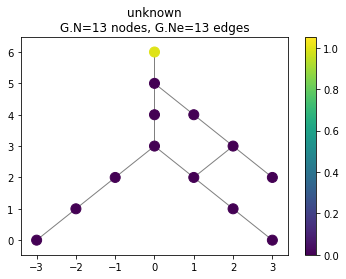

In [0]:
G = graphs.Graph(A)

coords = [[0, 6], [0, 5], [0, 4], [1, 4], [0, 3], [2, 3], [-1, 2], [1, 2], [3, 2], [-2, 1], [2, 1], [-3, 0], [3, 0]]
G.set_coordinates(coords)

G.plot_signal(np.concatenate(([1],[0]*12)))

In [0]:
def labgene(labs,N):
  g = np.zeros(N)
  for i in labs:
    g[i] = 1
  return g

[1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
[1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
[1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
[1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]


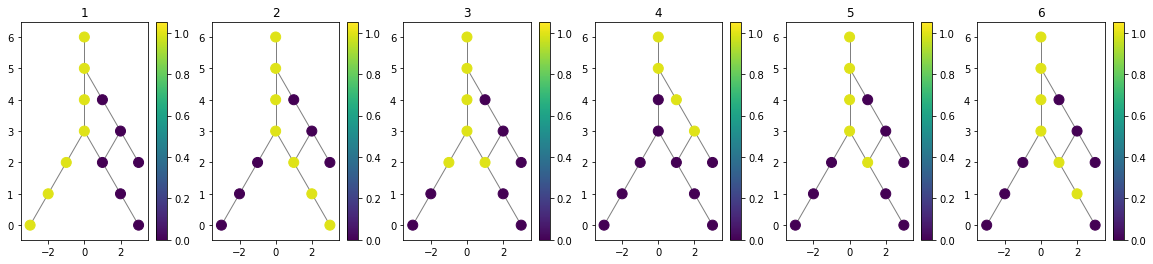

In [0]:
genes = []
genes.append(labgene([0,1,2,4,6,9,11],N))
genes.append(labgene([0,1,2,4,7,10,12],N))
genes.append(labgene([0,1,2,4,6,7],N))
genes.append(labgene([0,1,3,5],N))
genes.append(labgene([0,1,2,4,7],N))
genes.append(labgene([0,1,2,4,7,10],N))

#agregar mas genes ^^^

for i in genes:
  print(i)

n = len(genes)
strgen = "gen "

plotting.BACKEND = 'matplotlib'
fig, ax = plt.subplots(1, n, figsize=(20,4))

for i in range(n):
    ax1 = plt.subplot(1, n, i+1)
    G.plot_signal(genes[i], ax=ax1, plot_name=strgen.join(str(i+1)))

# Bases propias

## Un vector por hoja / Caminos unidos

[1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
[1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.]
[1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]


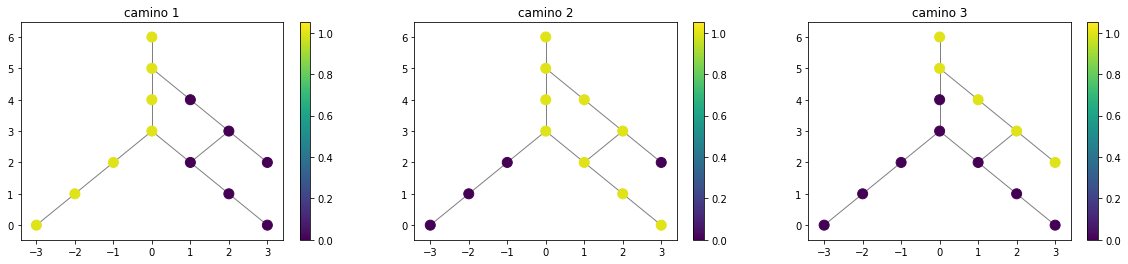

In [0]:
b1_camino1 = labgene([0,1,2,4,6,9,11],N)
b1_camino2 = labgene([0,1,2,3,4,5,7,10,12],N)
b1_camino3 = labgene([0,1,3,5,8],N)

print(b1_camino1)
print(b1_camino2)
print(b1_camino3)

plotting.BACKEND = 'matplotlib'
fig, ax = plt.subplots(1, 3, figsize=(20,4))

ax1 = plt.subplot(1, 3, 1);     G.plot_signal(b1_camino1, ax=ax1, plot_name="camino 1")
ax1 = plt.subplot(1, 3, 2);     G.plot_signal(b1_camino2, ax=ax1, plot_name="camino 2")
ax1 = plt.subplot(1, 3, 3);     G.plot_signal(b1_camino3, ax=ax1, plot_name="camino 3")

In [0]:
B1 = np.column_stack((b1_camino1, b1_camino2, b1_camino3)).T
print(B1)

d1=np.sum(B1.T,axis=0)
idx1=np.argsort(d1)
B1=B1[idx1,:]
print(B1)

n1 = np.linalg.norm(B1, axis=1, ord=1)
B1 = B1/n1[:,None]
print(B1)

[[1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]]
[[1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.]]
[[0.2        0.2        0.         0.2        0.         0.2
  0.         0.         0.2        0.         0.         0.
  0.        ]
 [0.14285714 0.14285714 0.14285714 0.         0.14285714 0.
  0.14285714 0.         0.         0.14285714 0.         0.14285714
  0.        ]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.         0.11111111 0.         0.         0.11111111 0.
  0.11111111]]


## Un vector por camino / Caminos separados

[1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
[1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
[1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1.]
[1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]


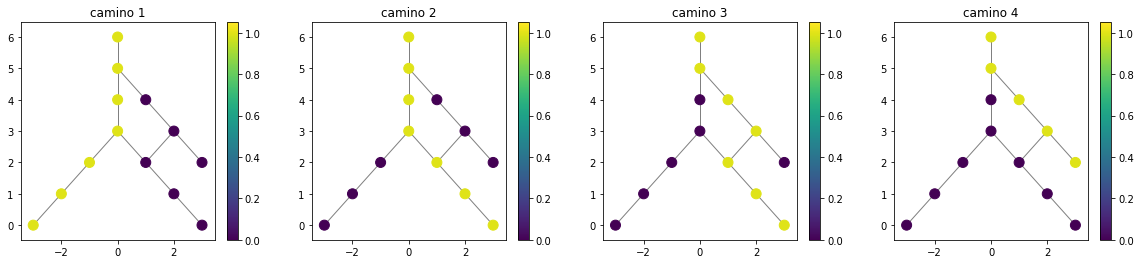

In [0]:
b2_camino1 = labgene([0,1,2,4,6,9,11],N)
b2_camino2 = labgene([0,1,2,4,7,10,12],N)
b2_camino3 = labgene([0,1,3,5,7,10,12],N)
b2_camino4 = labgene([0,1,3,5,8],N)

print(b2_camino1)
print(b2_camino2)
print(b2_camino3)
print(b2_camino4)

plotting.BACKEND = 'matplotlib'
fig, ax = plt.subplots(1, 4, figsize=(20,4))

ax1 = plt.subplot(1, 4, 1);     G.plot_signal(b2_camino1, ax=ax1, plot_name="camino 1")
ax1 = plt.subplot(1, 4, 2);     G.plot_signal(b2_camino2, ax=ax1, plot_name="camino 2")
ax1 = plt.subplot(1, 4, 3);     G.plot_signal(b2_camino3, ax=ax1, plot_name="camino 3")
ax1 = plt.subplot(1, 4, 4);     G.plot_signal(b2_camino4, ax=ax1, plot_name="camino 4")

In [0]:
B2 = np.column_stack((b2_camino1, b2_camino2, b2_camino3, b2_camino4)).T
print(B2)

d2=np.sum(B2.T,axis=0)
idx2=np.argsort(d2)
B2=B2[idx2,:]
print(B2)

n2 = np.linalg.norm(B2, axis=1, ord=1)
B2 = B2/n2[:,None]
print(B2)

[[1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]]
[[1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1.]]
[[0.2        0.2        0.         0.2        0.         0.2
  0.         0.         0.2        0.         0.         0.
  0.        ]
 [0.14285714 0.14285714 0.14285714 0.         0.14285714 0.
  0.14285714 0.         0.         0.14285714 0.         0.14285714
  0.        ]
 [0.14285714 0.14285714 0.14285714 0.         0.14285714 0.
  0.         0.14285714 0.         0.         0.14285714 0.
  0.14285714]
 [0.14285714 0.14285714 0.         0.14285714 0.         0.14285714
  0.         0.14285714 0.         0.         0.14285714 0.
  0.14285714]]


## Comparar bases

In [0]:
print(B1)
print(B2)

[[0.2        0.2        0.         0.2        0.         0.2
  0.         0.         0.2        0.         0.         0.
  0.        ]
 [0.14285714 0.14285714 0.14285714 0.         0.14285714 0.
  0.14285714 0.         0.         0.14285714 0.         0.14285714
  0.        ]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.         0.11111111 0.         0.         0.11111111 0.
  0.11111111]]
[[0.2        0.2        0.         0.2        0.         0.2
  0.         0.         0.2        0.         0.         0.
  0.        ]
 [0.14285714 0.14285714 0.14285714 0.         0.14285714 0.
  0.14285714 0.         0.         0.14285714 0.         0.14285714
  0.        ]
 [0.14285714 0.14285714 0.14285714 0.         0.14285714 0.
  0.         0.14285714 0.         0.         0.14285714 0.
  0.14285714]
 [0.14285714 0.14285714 0.         0.14285714 0.         0.14285714
  0.         0.14285714 0.         0.         0.14285714 0.
  0.14285714]]


# Pruebas

In [0]:
dist_B1 = np.zeros((n,n))
dist_B2 = np.zeros((n,n))
genes = np.column_stack(genes).T

ggf1 = np.dot(B1, genes.T).T
for i in range(n):
  for j in range(i,n):
    dist_B1[i,j] = np.linalg.norm(ggf1[i,:]-ggf1[j,:])

ggf2 = np.dot(B2, genes.T).T
for i in range(n):
  for j in range(i,n):
    dist_B2[i,j] = np.linalg.norm(ggf2[i,:]-ggf2[j,:])

dist_B1 = dist_B1 + dist_B1.T
dist_B2 = dist_B2 + dist_B2.T

print(dist_B1)
print(dist_B2)

[[0.         0.54294068 0.30655886 0.81865993 0.4427405  0.48275893]
 [0.54294068 0.         0.26417963 0.59392236 0.22222222 0.11111111]
 [0.30655886 0.26417963 0.         0.5966734  0.14285714 0.18098023]
 [0.81865993 0.59392236 0.5966734  0.         0.50396263 0.5394584 ]
 [0.4427405  0.22222222 0.14285714 0.50396263 0.         0.11111111]
 [0.48275893 0.11111111 0.18098023 0.5394584  0.11111111 0.        ]]
[[0.         0.74230749 0.34992711 0.91294545 0.47380354 0.58901509]
 [0.74230749 0.         0.42857143 0.87877466 0.40406102 0.20203051]
 [0.34992711 0.42857143 0.         0.74010479 0.14285714 0.24743583]
 [0.91294545 0.87877466 0.74010479 0.         0.66761837 0.75376605]
 [0.47380354 0.40406102 0.14285714 0.66761837 0.         0.20203051]
 [0.58901509 0.20203051 0.24743583 0.75376605 0.20203051 0.        ]]



 Caminos unidos
          1         2         3         4         5         6
1  0.000000  0.542941  0.306559  0.818660  0.442740  0.482759
2  0.542941  0.000000  0.264180  0.593922  0.222222  0.111111
3  0.306559  0.264180  0.000000  0.596673  0.142857  0.180980
4  0.818660  0.593922  0.596673  0.000000  0.503963  0.539458
5  0.442740  0.222222  0.142857  0.503963  0.000000  0.111111
6  0.482759  0.111111  0.180980  0.539458  0.111111  0.000000

 Caminos separados
          1         2         3         4         5         6
1  0.000000  0.742307  0.349927  0.912945  0.473804  0.589015
2  0.742307  0.000000  0.428571  0.878775  0.404061  0.202031
3  0.349927  0.428571  0.000000  0.740105  0.142857  0.247436
4  0.912945  0.878775  0.740105  0.000000  0.667618  0.753766
5  0.473804  0.404061  0.142857  0.667618  0.000000  0.202031
6  0.589015  0.202031  0.247436  0.753766  0.202031  0.000000


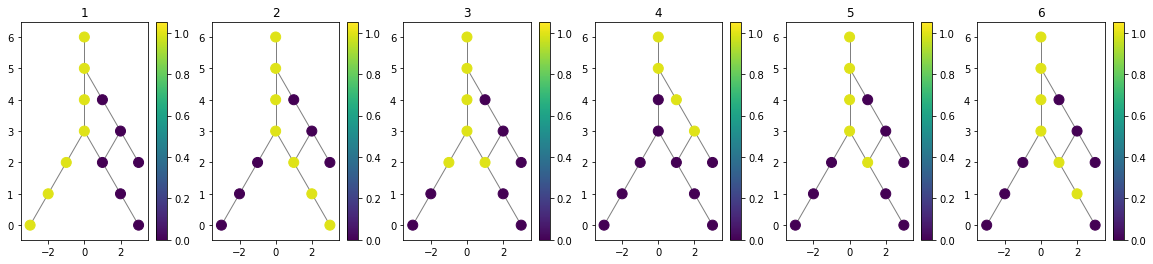

In [0]:
noms = []
for i in range(n):
  noms.append(strgen.join(str(i+1)))

print("\n Caminos unidos")
frame1 = pd.DataFrame(dist_B1, noms, noms)
print(frame1) 

print("\n Caminos separados")
frame2 = pd.DataFrame(dist_B2, noms, noms)
print(frame2) 

fig, ax = plt.subplots(1, n, figsize=(20,4))
for i in range(n):
    ax1 = plt.subplot(1, n, i+1);
    G.plot_signal(genes[i], ax=ax1, plot_name=noms[i])